In [1]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt

In [2]:
train_directory = '../data/Brats17TrainingData/'
valid_directory = '../data/Brats17ValidationData/'
test_directory = '../data/Brats17TestingData/'

In [52]:
def process_data(directory, postfix, saving_directory):
    image_names = os.listdir(directory)
    iterator = 0
    for name in image_names:
#       read images
        image = sitk.ReadImage(os.path.join(directory , name, name + postfix), sitk.sitkUInt16)
        image_seg = sitk.ReadImage(os.path.join(directory , name, name +'_seg.nii.gz'))
        vol = sitk.GetArrayFromImage(image)
        vol_seg = sitk.GetArrayFromImage(image_seg)
#       get slices with labels from image
        slices = slice_images(vol, vol_seg, 50, 130, 5)
#       save image
        for idx, (image, label) in enumerate(slices):
            iterator += 1
            image_name = name + '_' +str(idx) + '.png'
            save_image(image, os.path.join(saving_directory, str(label), image_name))
            print(os.path.join(saving_directory, str(label), image_name))
        print(iterator, ' generated images')
        
def slice_images(image_vol, image_seg_vol, from_z, to_z, step):
    return [(image_vol[z], get_label(image_seg_vol[z])) for z in range(from_z, to_z, step)]
        
        
def get_label(vol):
    return 1 if any(vol.flatten() > 0) else 0

def save_image(image, filename):
    
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory) 
    
    img = sitk.GetImageFromArray(image, isVector=False)
    sitk.WriteImage(img, filename, True)

In [56]:
process_data(train_directory + 'HGG', '_t1.nii.gz', '../data/train/t1')

../data/train/t1/1/Brats17_TCIA_343_1_0.png
../data/train/t1/1/Brats17_TCIA_343_1_1.png
../data/train/t1/1/Brats17_TCIA_343_1_2.png
../data/train/t1/1/Brats17_TCIA_343_1_3.png
../data/train/t1/1/Brats17_TCIA_343_1_4.png
../data/train/t1/1/Brats17_TCIA_343_1_5.png
../data/train/t1/1/Brats17_TCIA_343_1_6.png
../data/train/t1/1/Brats17_TCIA_343_1_7.png
../data/train/t1/0/Brats17_TCIA_343_1_8.png
../data/train/t1/0/Brats17_TCIA_343_1_9.png
../data/train/t1/0/Brats17_TCIA_343_1_10.png
../data/train/t1/0/Brats17_TCIA_343_1_11.png
../data/train/t1/0/Brats17_TCIA_343_1_12.png
../data/train/t1/0/Brats17_TCIA_343_1_13.png
../data/train/t1/0/Brats17_TCIA_343_1_14.png
../data/train/t1/0/Brats17_TCIA_343_1_15.png
16  generated images
../data/train/t1/0/Brats17_CBICA_AQN_1_0.png
../data/train/t1/0/Brats17_CBICA_AQN_1_1.png
../data/train/t1/0/Brats17_CBICA_AQN_1_2.png
../data/train/t1/0/Brats17_CBICA_AQN_1_3.png
../data/train/t1/0/Brats17_CBICA_AQN_1_4.png
../data/train/t1/0/Brats17_CBICA_AQN_1_5.png

../data/train/t1/0/Brats17_CBICA_AAL_1_0.png
../data/train/t1/0/Brats17_CBICA_AAL_1_1.png
../data/train/t1/1/Brats17_CBICA_AAL_1_2.png
../data/train/t1/1/Brats17_CBICA_AAL_1_3.png
../data/train/t1/1/Brats17_CBICA_AAL_1_4.png
../data/train/t1/1/Brats17_CBICA_AAL_1_5.png
../data/train/t1/1/Brats17_CBICA_AAL_1_6.png
../data/train/t1/1/Brats17_CBICA_AAL_1_7.png
../data/train/t1/1/Brats17_CBICA_AAL_1_8.png
../data/train/t1/1/Brats17_CBICA_AAL_1_9.png
../data/train/t1/1/Brats17_CBICA_AAL_1_10.png
../data/train/t1/1/Brats17_CBICA_AAL_1_11.png
../data/train/t1/0/Brats17_CBICA_AAL_1_12.png
../data/train/t1/0/Brats17_CBICA_AAL_1_13.png
../data/train/t1/0/Brats17_CBICA_AAL_1_14.png
../data/train/t1/0/Brats17_CBICA_AAL_1_15.png
208  generated images
../data/train/t1/0/Brats17_2013_12_1_0.png
../data/train/t1/1/Brats17_2013_12_1_1.png
../data/train/t1/1/Brats17_2013_12_1_2.png
../data/train/t1/1/Brats17_2013_12_1_3.png
../data/train/t1/1/Brats17_2013_12_1_4.png
../data/train/t1/1/Brats17_2013_12_1_

../data/train/t1/1/Brats17_CBICA_APY_1_2.png
../data/train/t1/1/Brats17_CBICA_APY_1_3.png
../data/train/t1/1/Brats17_CBICA_APY_1_4.png
../data/train/t1/1/Brats17_CBICA_APY_1_5.png
../data/train/t1/1/Brats17_CBICA_APY_1_6.png
../data/train/t1/1/Brats17_CBICA_APY_1_7.png
../data/train/t1/1/Brats17_CBICA_APY_1_8.png
../data/train/t1/1/Brats17_CBICA_APY_1_9.png
../data/train/t1/1/Brats17_CBICA_APY_1_10.png
../data/train/t1/1/Brats17_CBICA_APY_1_11.png
../data/train/t1/0/Brats17_CBICA_APY_1_12.png
../data/train/t1/0/Brats17_CBICA_APY_1_13.png
../data/train/t1/0/Brats17_CBICA_APY_1_14.png
../data/train/t1/0/Brats17_CBICA_APY_1_15.png
400  generated images
../data/train/t1/1/Brats17_TCIA_429_1_0.png
../data/train/t1/1/Brats17_TCIA_429_1_1.png
../data/train/t1/1/Brats17_TCIA_429_1_2.png
../data/train/t1/1/Brats17_TCIA_429_1_3.png
../data/train/t1/1/Brats17_TCIA_429_1_4.png
../data/train/t1/1/Brats17_TCIA_429_1_5.png
../data/train/t1/1/Brats17_TCIA_429_1_6.png
../data/train/t1/1/Brats17_TCIA_42

../data/train/t1/1/Brats17_CBICA_ATB_1_9.png
../data/train/t1/1/Brats17_CBICA_ATB_1_10.png
../data/train/t1/1/Brats17_CBICA_ATB_1_11.png
../data/train/t1/1/Brats17_CBICA_ATB_1_12.png
../data/train/t1/1/Brats17_CBICA_ATB_1_13.png
../data/train/t1/1/Brats17_CBICA_ATB_1_14.png
../data/train/t1/1/Brats17_CBICA_ATB_1_15.png
576  generated images
../data/train/t1/0/Brats17_CBICA_APR_1_0.png
../data/train/t1/0/Brats17_CBICA_APR_1_1.png
../data/train/t1/0/Brats17_CBICA_APR_1_2.png
../data/train/t1/0/Brats17_CBICA_APR_1_3.png
../data/train/t1/0/Brats17_CBICA_APR_1_4.png
../data/train/t1/1/Brats17_CBICA_APR_1_5.png
../data/train/t1/1/Brats17_CBICA_APR_1_6.png
../data/train/t1/1/Brats17_CBICA_APR_1_7.png
../data/train/t1/1/Brats17_CBICA_APR_1_8.png
../data/train/t1/1/Brats17_CBICA_APR_1_9.png
../data/train/t1/1/Brats17_CBICA_APR_1_10.png
../data/train/t1/1/Brats17_CBICA_APR_1_11.png
../data/train/t1/1/Brats17_CBICA_APR_1_12.png
../data/train/t1/1/Brats17_CBICA_APR_1_13.png
../data/train/t1/1/Brat

../data/train/t1/1/Brats17_TCIA_419_1_3.png
../data/train/t1/1/Brats17_TCIA_419_1_4.png
../data/train/t1/1/Brats17_TCIA_419_1_5.png
../data/train/t1/1/Brats17_TCIA_419_1_6.png
../data/train/t1/1/Brats17_TCIA_419_1_7.png
../data/train/t1/1/Brats17_TCIA_419_1_8.png
../data/train/t1/1/Brats17_TCIA_419_1_9.png
../data/train/t1/1/Brats17_TCIA_419_1_10.png
../data/train/t1/0/Brats17_TCIA_419_1_11.png
../data/train/t1/0/Brats17_TCIA_419_1_12.png
../data/train/t1/0/Brats17_TCIA_419_1_13.png
../data/train/t1/0/Brats17_TCIA_419_1_14.png
../data/train/t1/0/Brats17_TCIA_419_1_15.png
768  generated images
../data/train/t1/1/Brats17_CBICA_AQT_1_0.png
../data/train/t1/1/Brats17_CBICA_AQT_1_1.png
../data/train/t1/1/Brats17_CBICA_AQT_1_2.png
../data/train/t1/1/Brats17_CBICA_AQT_1_3.png
../data/train/t1/1/Brats17_CBICA_AQT_1_4.png
../data/train/t1/1/Brats17_CBICA_AQT_1_5.png
../data/train/t1/1/Brats17_CBICA_AQT_1_6.png
../data/train/t1/1/Brats17_CBICA_AQT_1_7.png
../data/train/t1/1/Brats17_CBICA_AQT_1_8

../data/train/t1/1/Brats17_TCIA_111_1_3.png
../data/train/t1/1/Brats17_TCIA_111_1_4.png
../data/train/t1/1/Brats17_TCIA_111_1_5.png
../data/train/t1/1/Brats17_TCIA_111_1_6.png
../data/train/t1/1/Brats17_TCIA_111_1_7.png
../data/train/t1/1/Brats17_TCIA_111_1_8.png
../data/train/t1/0/Brats17_TCIA_111_1_9.png
../data/train/t1/0/Brats17_TCIA_111_1_10.png
../data/train/t1/0/Brats17_TCIA_111_1_11.png
../data/train/t1/0/Brats17_TCIA_111_1_12.png
../data/train/t1/0/Brats17_TCIA_111_1_13.png
../data/train/t1/0/Brats17_TCIA_111_1_14.png
../data/train/t1/0/Brats17_TCIA_111_1_15.png
960  generated images
../data/train/t1/1/Brats17_CBICA_AVG_1_0.png
../data/train/t1/1/Brats17_CBICA_AVG_1_1.png
../data/train/t1/1/Brats17_CBICA_AVG_1_2.png
../data/train/t1/1/Brats17_CBICA_AVG_1_3.png
../data/train/t1/1/Brats17_CBICA_AVG_1_4.png
../data/train/t1/1/Brats17_CBICA_AVG_1_5.png
../data/train/t1/1/Brats17_CBICA_AVG_1_6.png
../data/train/t1/1/Brats17_CBICA_AVG_1_7.png
../data/train/t1/0/Brats17_CBICA_AVG_1_8

../data/train/t1/1/Brats17_CBICA_ABN_1_4.png
../data/train/t1/0/Brats17_CBICA_ABN_1_5.png
../data/train/t1/0/Brats17_CBICA_ABN_1_6.png
../data/train/t1/0/Brats17_CBICA_ABN_1_7.png
../data/train/t1/0/Brats17_CBICA_ABN_1_8.png
../data/train/t1/0/Brats17_CBICA_ABN_1_9.png
../data/train/t1/0/Brats17_CBICA_ABN_1_10.png
../data/train/t1/0/Brats17_CBICA_ABN_1_11.png
../data/train/t1/0/Brats17_CBICA_ABN_1_12.png
../data/train/t1/0/Brats17_CBICA_ABN_1_13.png
../data/train/t1/0/Brats17_CBICA_ABN_1_14.png
../data/train/t1/0/Brats17_CBICA_ABN_1_15.png
1152  generated images
../data/train/t1/1/Brats17_CBICA_AOZ_1_0.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_1.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_2.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_3.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_4.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_5.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_6.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_7.png
../data/train/t1/1/Brats17_CBICA_AOZ_1_8.png
../data/train/t1/1/Brats17

../data/train/t1/1/Brats17_CBICA_AVJ_1_0.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_1.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_2.png
../data/train/t1/0/Brats17_CBICA_AVJ_1_3.png
../data/train/t1/0/Brats17_CBICA_AVJ_1_4.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_5.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_6.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_7.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_8.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_9.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_10.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_11.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_12.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_13.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_14.png
../data/train/t1/1/Brats17_CBICA_AVJ_1_15.png
1344  generated images
../data/train/t1/0/Brats17_CBICA_AOP_1_0.png
../data/train/t1/0/Brats17_CBICA_AOP_1_1.png
../data/train/t1/0/Brats17_CBICA_AOP_1_2.png
../data/train/t1/0/Brats17_CBICA_AOP_1_3.png
../data/train/t1/0/Brats17_CBICA_AOP_1_4.png
../data/train/t1/1/Brats17

../data/train/t1/1/Brats17_CBICA_ANZ_1_0.png
../data/train/t1/1/Brats17_CBICA_ANZ_1_1.png
../data/train/t1/1/Brats17_CBICA_ANZ_1_2.png
../data/train/t1/1/Brats17_CBICA_ANZ_1_3.png
../data/train/t1/1/Brats17_CBICA_ANZ_1_4.png
../data/train/t1/1/Brats17_CBICA_ANZ_1_5.png
../data/train/t1/1/Brats17_CBICA_ANZ_1_6.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_7.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_8.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_9.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_10.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_11.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_12.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_13.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_14.png
../data/train/t1/0/Brats17_CBICA_ANZ_1_15.png
1552  generated images
../data/train/t1/1/Brats17_CBICA_AXW_1_0.png
../data/train/t1/1/Brats17_CBICA_AXW_1_1.png
../data/train/t1/1/Brats17_CBICA_AXW_1_2.png
../data/train/t1/1/Brats17_CBICA_AXW_1_3.png
../data/train/t1/1/Brats17_CBICA_AXW_1_4.png
../data/train/t1/1/Brats17

../data/train/t1/1/Brats17_CBICA_BFP_1_10.png
../data/train/t1/1/Brats17_CBICA_BFP_1_11.png
../data/train/t1/1/Brats17_CBICA_BFP_1_12.png
../data/train/t1/1/Brats17_CBICA_BFP_1_13.png
../data/train/t1/1/Brats17_CBICA_BFP_1_14.png
../data/train/t1/1/Brats17_CBICA_BFP_1_15.png
1728  generated images
../data/train/t1/1/Brats17_2013_14_1_0.png
../data/train/t1/1/Brats17_2013_14_1_1.png
../data/train/t1/1/Brats17_2013_14_1_2.png
../data/train/t1/1/Brats17_2013_14_1_3.png
../data/train/t1/1/Brats17_2013_14_1_4.png
../data/train/t1/1/Brats17_2013_14_1_5.png
../data/train/t1/1/Brats17_2013_14_1_6.png
../data/train/t1/1/Brats17_2013_14_1_7.png
../data/train/t1/1/Brats17_2013_14_1_8.png
../data/train/t1/1/Brats17_2013_14_1_9.png
../data/train/t1/1/Brats17_2013_14_1_10.png
../data/train/t1/1/Brats17_2013_14_1_11.png
../data/train/t1/1/Brats17_2013_14_1_12.png
../data/train/t1/0/Brats17_2013_14_1_13.png
../data/train/t1/0/Brats17_2013_14_1_14.png
../data/train/t1/0/Brats17_2013_14_1_15.png
1744  g

../data/train/t1/1/Brats17_TCIA_332_1_0.png
../data/train/t1/1/Brats17_TCIA_332_1_1.png
../data/train/t1/1/Brats17_TCIA_332_1_2.png
../data/train/t1/1/Brats17_TCIA_332_1_3.png
../data/train/t1/1/Brats17_TCIA_332_1_4.png
../data/train/t1/1/Brats17_TCIA_332_1_5.png
../data/train/t1/1/Brats17_TCIA_332_1_6.png
../data/train/t1/1/Brats17_TCIA_332_1_7.png
../data/train/t1/1/Brats17_TCIA_332_1_8.png
../data/train/t1/1/Brats17_TCIA_332_1_9.png
../data/train/t1/1/Brats17_TCIA_332_1_10.png
../data/train/t1/1/Brats17_TCIA_332_1_11.png
../data/train/t1/1/Brats17_TCIA_332_1_12.png
../data/train/t1/0/Brats17_TCIA_332_1_13.png
../data/train/t1/0/Brats17_TCIA_332_1_14.png
../data/train/t1/0/Brats17_TCIA_332_1_15.png
1936  generated images
../data/train/t1/0/Brats17_CBICA_AXM_1_0.png
../data/train/t1/0/Brats17_CBICA_AXM_1_1.png
../data/train/t1/0/Brats17_CBICA_AXM_1_2.png
../data/train/t1/1/Brats17_CBICA_AXM_1_3.png
../data/train/t1/1/Brats17_CBICA_AXM_1_4.png
../data/train/t1/1/Brats17_CBICA_AXM_1_5.p

../data/train/t1/0/Brats17_TCIA_199_1_0.png
../data/train/t1/1/Brats17_TCIA_199_1_1.png
../data/train/t1/1/Brats17_TCIA_199_1_2.png
../data/train/t1/1/Brats17_TCIA_199_1_3.png
../data/train/t1/1/Brats17_TCIA_199_1_4.png
../data/train/t1/1/Brats17_TCIA_199_1_5.png
../data/train/t1/1/Brats17_TCIA_199_1_6.png
../data/train/t1/1/Brats17_TCIA_199_1_7.png
../data/train/t1/1/Brats17_TCIA_199_1_8.png
../data/train/t1/1/Brats17_TCIA_199_1_9.png
../data/train/t1/1/Brats17_TCIA_199_1_10.png
../data/train/t1/1/Brats17_TCIA_199_1_11.png
../data/train/t1/1/Brats17_TCIA_199_1_12.png
../data/train/t1/1/Brats17_TCIA_199_1_13.png
../data/train/t1/1/Brats17_TCIA_199_1_14.png
../data/train/t1/1/Brats17_TCIA_199_1_15.png
2128  generated images
../data/train/t1/0/Brats17_TCIA_168_1_0.png
../data/train/t1/0/Brats17_TCIA_168_1_1.png
../data/train/t1/0/Brats17_TCIA_168_1_2.png
../data/train/t1/1/Brats17_TCIA_168_1_3.png
../data/train/t1/1/Brats17_TCIA_168_1_4.png
../data/train/t1/1/Brats17_TCIA_168_1_5.png
../

../data/train/t1/0/Brats17_CBICA_AAP_1_0.png
../data/train/t1/1/Brats17_CBICA_AAP_1_1.png
../data/train/t1/1/Brats17_CBICA_AAP_1_2.png
../data/train/t1/1/Brats17_CBICA_AAP_1_3.png
../data/train/t1/1/Brats17_CBICA_AAP_1_4.png
../data/train/t1/1/Brats17_CBICA_AAP_1_5.png
../data/train/t1/1/Brats17_CBICA_AAP_1_6.png
../data/train/t1/1/Brats17_CBICA_AAP_1_7.png
../data/train/t1/1/Brats17_CBICA_AAP_1_8.png
../data/train/t1/1/Brats17_CBICA_AAP_1_9.png
../data/train/t1/1/Brats17_CBICA_AAP_1_10.png
../data/train/t1/1/Brats17_CBICA_AAP_1_11.png
../data/train/t1/1/Brats17_CBICA_AAP_1_12.png
../data/train/t1/1/Brats17_CBICA_AAP_1_13.png
../data/train/t1/1/Brats17_CBICA_AAP_1_14.png
../data/train/t1/0/Brats17_CBICA_AAP_1_15.png
2336  generated images
../data/train/t1/1/Brats17_TCIA_296_1_0.png
../data/train/t1/1/Brats17_TCIA_296_1_1.png
../data/train/t1/1/Brats17_TCIA_296_1_2.png
../data/train/t1/1/Brats17_TCIA_296_1_3.png
../data/train/t1/1/Brats17_TCIA_296_1_4.png
../data/train/t1/1/Brats17_TCIA

../data/train/t1/0/Brats17_TCIA_135_1_0.png
../data/train/t1/0/Brats17_TCIA_135_1_1.png
../data/train/t1/0/Brats17_TCIA_135_1_2.png
../data/train/t1/0/Brats17_TCIA_135_1_3.png
../data/train/t1/1/Brats17_TCIA_135_1_4.png
../data/train/t1/1/Brats17_TCIA_135_1_5.png
../data/train/t1/1/Brats17_TCIA_135_1_6.png
../data/train/t1/1/Brats17_TCIA_135_1_7.png
../data/train/t1/1/Brats17_TCIA_135_1_8.png
../data/train/t1/1/Brats17_TCIA_135_1_9.png
../data/train/t1/1/Brats17_TCIA_135_1_10.png
../data/train/t1/1/Brats17_TCIA_135_1_11.png
../data/train/t1/1/Brats17_TCIA_135_1_12.png
../data/train/t1/1/Brats17_TCIA_135_1_13.png
../data/train/t1/1/Brats17_TCIA_135_1_14.png
../data/train/t1/1/Brats17_TCIA_135_1_15.png
2528  generated images
../data/train/t1/0/Brats17_TCIA_192_1_0.png
../data/train/t1/0/Brats17_TCIA_192_1_1.png
../data/train/t1/0/Brats17_TCIA_192_1_2.png
../data/train/t1/0/Brats17_TCIA_192_1_3.png
../data/train/t1/1/Brats17_TCIA_192_1_4.png
../data/train/t1/1/Brats17_TCIA_192_1_5.png
../

../data/train/t1/1/Brats17_CBICA_AQQ_1_0.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_1.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_2.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_3.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_4.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_5.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_6.png
../data/train/t1/1/Brats17_CBICA_AQQ_1_7.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_8.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_9.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_10.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_11.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_12.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_13.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_14.png
../data/train/t1/0/Brats17_CBICA_AQQ_1_15.png
2720  generated images
../data/train/t1/1/Brats17_CBICA_AOD_1_0.png
../data/train/t1/1/Brats17_CBICA_AOD_1_1.png
../data/train/t1/1/Brats17_CBICA_AOD_1_2.png
../data/train/t1/1/Brats17_CBICA_AOD_1_3.png
../data/train/t1/1/Brats17_CBICA_AOD_1_4.png
../data/train/t1/1/Brats17

../data/train/t1/0/Brats17_CBICA_AQJ_1_0.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_1.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_2.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_3.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_4.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_5.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_6.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_7.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_8.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_9.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_10.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_11.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_12.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_13.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_14.png
../data/train/t1/1/Brats17_CBICA_AQJ_1_15.png
2912  generated images
../data/train/t1/0/Brats17_TCIA_257_1_0.png
../data/train/t1/1/Brats17_TCIA_257_1_1.png
../data/train/t1/1/Brats17_TCIA_257_1_2.png
../data/train/t1/1/Brats17_TCIA_257_1_3.png
../data/train/t1/1/Brats17_TCIA_257_1_4.png
../data/train/t1/1/Brats17_TCIA

../data/train/t1/1/Brats17_CBICA_ASE_1_0.png
../data/train/t1/1/Brats17_CBICA_ASE_1_1.png
../data/train/t1/1/Brats17_CBICA_ASE_1_2.png
../data/train/t1/1/Brats17_CBICA_ASE_1_3.png
../data/train/t1/1/Brats17_CBICA_ASE_1_4.png
../data/train/t1/1/Brats17_CBICA_ASE_1_5.png
../data/train/t1/1/Brats17_CBICA_ASE_1_6.png
../data/train/t1/0/Brats17_CBICA_ASE_1_7.png
../data/train/t1/0/Brats17_CBICA_ASE_1_8.png
../data/train/t1/0/Brats17_CBICA_ASE_1_9.png
../data/train/t1/0/Brats17_CBICA_ASE_1_10.png
../data/train/t1/0/Brats17_CBICA_ASE_1_11.png
../data/train/t1/0/Brats17_CBICA_ASE_1_12.png
../data/train/t1/0/Brats17_CBICA_ASE_1_13.png
../data/train/t1/0/Brats17_CBICA_ASE_1_14.png
../data/train/t1/0/Brats17_CBICA_ASE_1_15.png
3104  generated images
../data/train/t1/0/Brats17_2013_18_1_0.png
../data/train/t1/0/Brats17_2013_18_1_1.png
../data/train/t1/1/Brats17_2013_18_1_2.png
../data/train/t1/1/Brats17_2013_18_1_3.png
../data/train/t1/1/Brats17_2013_18_1_4.png
../data/train/t1/1/Brats17_2013_18_1

../data/train/t1/0/Brats17_TCIA_190_1_0.png
../data/train/t1/0/Brats17_TCIA_190_1_1.png
../data/train/t1/0/Brats17_TCIA_190_1_2.png
../data/train/t1/0/Brats17_TCIA_190_1_3.png
../data/train/t1/1/Brats17_TCIA_190_1_4.png
../data/train/t1/1/Brats17_TCIA_190_1_5.png
../data/train/t1/1/Brats17_TCIA_190_1_6.png
../data/train/t1/1/Brats17_TCIA_190_1_7.png
../data/train/t1/1/Brats17_TCIA_190_1_8.png
../data/train/t1/1/Brats17_TCIA_190_1_9.png
../data/train/t1/1/Brats17_TCIA_190_1_10.png
../data/train/t1/1/Brats17_TCIA_190_1_11.png
../data/train/t1/1/Brats17_TCIA_190_1_12.png
../data/train/t1/0/Brats17_TCIA_190_1_13.png
../data/train/t1/0/Brats17_TCIA_190_1_14.png
../data/train/t1/0/Brats17_TCIA_190_1_15.png
3312  generated images
../data/train/t1/1/Brats17_CBICA_AXN_1_0.png
../data/train/t1/1/Brats17_CBICA_AXN_1_1.png
../data/train/t1/1/Brats17_CBICA_AXN_1_2.png
../data/train/t1/1/Brats17_CBICA_AXN_1_3.png
../data/train/t1/1/Brats17_CBICA_AXN_1_4.png
../data/train/t1/1/Brats17_CBICA_AXN_1_5.p

**Train: 3360 images**

### Slices from one brain sample

In [48]:
def read_img(path):
    image = sitk.ReadImage(path, sitk.sitkUInt16)
    return sitk.GetArrayFromImage(image)
    
def imshow(vol,title:str, ax=None):
    if ax:
        ax.imshow(vol, cmap = 'gray')
        ax.axis('off')
        ax.set_title(title)
    else:
        plt.imshow(vol, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
def get_label_from_path(path):
    return '1' if path.find('/1/') > 0 else '0'

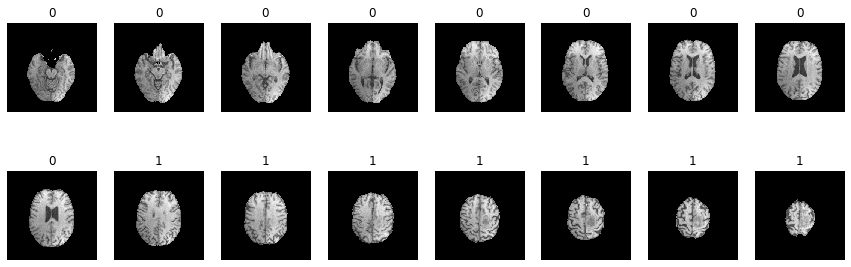

In [49]:
paths = iter(['../data/train/0/Brats17_CBICA_AQN_1_0.png','../data/train/0/Brats17_CBICA_AQN_1_1.png','../data/train/0/Brats17_CBICA_AQN_1_2.png','../data/train/0/Brats17_CBICA_AQN_1_3.png',
'../data/train/0/Brats17_CBICA_AQN_1_4.png','../data/train/0/Brats17_CBICA_AQN_1_5.png','../data/train/0/Brats17_CBICA_AQN_1_6.png','../data/train/0/Brats17_CBICA_AQN_1_7.png',
'../data/train/0/Brats17_CBICA_AQN_1_8.png','../data/train/1/Brats17_CBICA_AQN_1_9.png','../data/train/1/Brats17_CBICA_AQN_1_10.png','../data/train/1/Brats17_CBICA_AQN_1_11.png',
'../data/train/1/Brats17_CBICA_AQN_1_12.png','../data/train/1/Brats17_CBICA_AQN_1_13.png','../data/train/1/Brats17_CBICA_AQN_1_14.png','../data/train/1/Brats17_CBICA_AQN_1_15.png'])

fig, axs = plt.subplots(2, 8, figsize=(15, 5))
for y in range(0,2):
    for x in range(0,8):
        path = next(paths)
        imshow(read_img(path),get_label_from_path(path),axs[y][x])